In [1]:
import os
import sys
from pathlib import Path

home_dir = os.path.expanduser("~")
sys.path.append(str((Path(home_dir) / "watermark/code-vseal/videoseal").resolve()))

In [2]:
import torch

import torchvision.transforms as transforms
from torchvision.transforms import v2
from videoseal.utils.helpers import plot

from torchvision.transforms import ToPILImage, ToTensor

import torch.nn.functional as F

from PIL import Image, ImageDraw, ImageFont


from matplotlib import font_manager

# Find the font path by name
font_path = font_manager.findfont("DejaVu Sans")


In [52]:
default_font_path = font_manager.findfont(font_manager.FontProperties())

In [53]:
default_font_path

'/private/home/tuantran/.conda/envs/vseal/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [11]:
def insert_logo(main_image_path, logo_image_path, logo_scale=0.2):
    # Load images
    main_image = Image.open(main_image_path).convert("RGBA")
    logo_image = Image.open(logo_image_path).convert("RGBA")

    # Resize logo
    main_width, main_height = main_image.size
    logo_max_size = int(min(main_width, main_height) * logo_scale)
    logo_image.thumbnail((logo_max_size, logo_max_size), Image.LANCZOS)

    # Position logo at bottom-right
    logo_width, logo_height = logo_image.size
    position = (main_width - logo_width, main_height - logo_height)

    # Composite logo onto main image
    main_image.paste(logo_image, position, logo_image)

    # Save or return
    return main_image


In [6]:
with open(Path("astronaut.jpg"), "rb") as fh:
    img = Image.open(Path("astronaut.jpg"))

In [12]:
img = insert_logo("astronaut.jpg", "Meta-Logo.png")

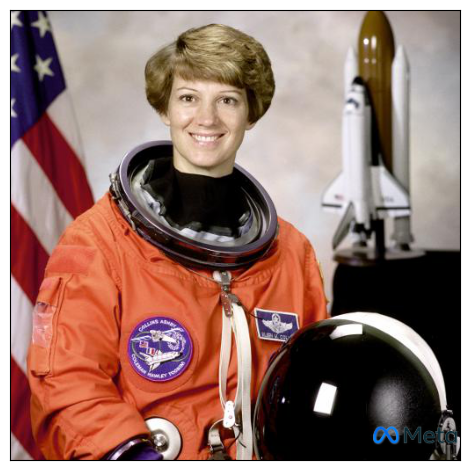

In [13]:
plot([img])

In [28]:
img_t = transforms.ToTensor()(img)

In [29]:
img_t.shape

torch.Size([3, 512, 512])

In [74]:
img_b = img_t.unsqueeze(0)

In [75]:
p = v2.Pad(padding=30)(img_b)

In [77]:
p.shape

torch.Size([1, 3, 572, 572])

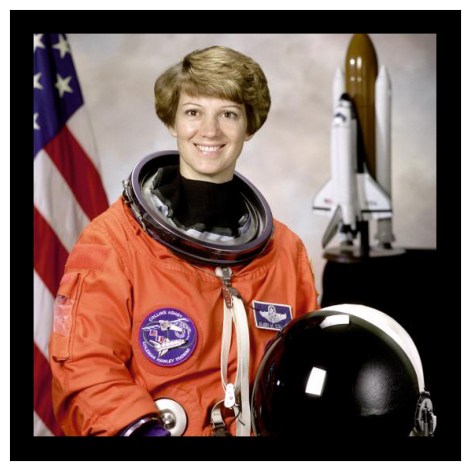

In [76]:
plot(p)

In [30]:
def add_meme_text(img_t, top_text, bottom_text):
    drawer = v2.Compose([ToPILImage(), Image.Draw
    img = ToPILImage()(img_t)

    # Open the image
    draw = ImageDraw.Draw(img)

    # Load a font (you can specify a TTF file for better styling)
    font = ImageFont.truetype(font_path, 24)

    # Calculate positions
    width, height = img.size
    top_position = (width // 2, 10)
    bottom_position = (width // 2, height - 20)

    # Draw text with center alignment
    draw.text(top_position, top_text, font=font, fill="white", anchor="mm")
    draw.text(bottom_position, bottom_text, font=font, fill="white", anchor="mm")

    # Save the result
    transform_func = transforms.ToTensor()
    o = transform_func(img)

    return o


In [31]:
t = add_meme_text(img_t, "top", "bottom")

In [55]:
t.shape

torch.Size([3, 512, 512])

In [66]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Create an image
img = ToPILImage()(img_t)
draw = ImageDraw.Draw(img)

# Load a font
font = ImageFont.truetype(font_path, 20)

# Your long text
text = "This is a very long text that needs to be wrapped properly to fit within the image width."

# Set maximum width in pixels
max_width = 380

# Wrap text based on pixel width
words = text.split()
lines = []
line = ""

for word in words:
    test_line = f"{line} {word}".strip()
    if draw.textlength(test_line, font=font) <= max_width:
        line = test_line
    else:
        lines.append(line)
        line = word
if line:
    lines.append(line)

# Get line height
ascent, descent = font.getmetrics()
line_height = ascent + descent + 5  # Add spacing

# Draw text
y = 10
for line in lines:
    draw.text((10, y), line, font=font, fill='black')
    y += line_height

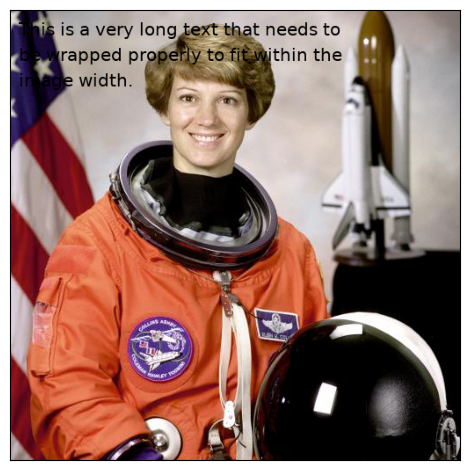

In [65]:
plot([img])

In [78]:
transform = transforms.Compose([ToPILImage(), transforms.Resize((512, 512)),ToTensor()])

p_t = transform(p)

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [86]:
p_t = F.interpolate(p, size=(512, 512), mode="bilinear", align_corners=True)

In [89]:
p_t.size(-2)

512